## Stock prediction on Google stock using the Linear Regressor, Random Forest Regressor, Decision Tree Regressor, SVR Regressor and KNN Regressor.
Stock price prediction has beeen one the complex problems in machine learning due to the relatively unstable nature of the movement of stock prices. In this project we will be exploring the five models mentioned above to determine which model best predict stock prices for the future.

## Importing Our Libraries and reading our data

In [ ]:
import scipy as sp
import pandas as pd
import numpy as np
from subprocess import check_output
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM

import time, json
from datetime import date

import time
import math
import sklearn.preprocessing as prep
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

In [63]:
##Reading our data
df = pd.read_csv('Google.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
1,2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2,2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
3,2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
4,2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [118]:
df.shape

(3125, 13)

## Data Cleaning

In [64]:
##Filtering our data for only the columns we need
google = df.filter(["Date","Open", "High", "Low", "Close", "Volume"]) 
google

,Date,Open,High,Low,Close,Volume
0,2004-08-19,100.01,104.06,95.9600,100.335,44659000.0
1,2004-08-20,101.01,109.08,100.5000,108.310,22834300.0
2,2004-08-23,110.76,113.48,109.0500,109.400,18256100.0
3,2004-08-24,111.24,111.60,103.5700,104.870,15247300.0
4,2004-08-25,104.76,108.00,103.8800,106.000,9188600.0
...,...,...,...,...,...,...
3120,2017-01-10,827.07,829.41,823.1400,826.010,1141799.0
3121,2017-01-11,826.62,829.90,821.4700,829.860,1261666.0
3122,2017-01-12,828.38,830.38,821.0100,829.530,1348274.0
3123,2017-01-13,831.00,834.65,829.5200,830.940,1255255.0


## Data Preprocessing
Here we are going to scale our data Using the Standard scaler in order to have better results when we apply our models. We will then proceec to convert our data into time series and split our scaled data into training and test sets.

In [23]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [65]:
##Function created to convert our data into time series
def create_dataset(dataset,past=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-past-1):
        j = dataset[i:(i+past), 0]
        dataX.append(j)
        dataY.append(dataset[i + past, 0])
    return np.array(dataX), np.array(dataY)

In [119]:
##Function which scales our data and splits them into training and test sets
def testandtrain(prices):
    scaler = MinMaxScaler(feature_range=(0, 1))
    prices = scaler.fit_transform(prices)
    trainsize = int(len(prices) * 0.80)
    testsize = len(prices) - trainsize
    train, test = prices[0:trainsize,:], prices[trainsize:len(prices),:]
    print(len(train), len(test))
    
    x_train,y_train = create_dataset(train,1)
    x_test,y_test = create_dataset(test,1)
    
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.fit_transform(x_test)
    #y_test =scaler.fit_transform(y_test)
    #y_train=scaler.fit_transform(y_train)
    return x_train,y_train, x_test,y_test

In [120]:
trainX, trainY, testX, testY=testandtrain(prices)

2500 625


## Application of Models
## Random Forest Regressor

In [121]:
## Applying the Random Forest Regressor to our data
randomforest  = RandomForestRegressor(random_state=2017,verbose=2,n_jobs=5) #random forest algorithm
randomforest.fit(trainX,trainY)

building tree 1 of 10building tree 2 of 10

building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


C:\Python\envs\ML Project\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=5,
                      oob_score=False, random_state=2017, verbose=2,
                      warm_start=False)

In [122]:
test=[]
test= randomforest.predict(testX)
print(test)

[0.2996402  0.30561524 0.2850173  0.28738661 0.24932061 0.21675563
 0.2547792  0.22108492 0.22557491 0.21773724 0.24527655 0.2448909
 0.21669016 0.25527556 0.27018102 0.24832524 0.28163832 0.28980324
 0.28738661 0.2809652  0.28679562 0.28104823 0.27138801 0.25201935
 0.2439437  0.25449933 0.26507059 0.27270209 0.28081923 0.29773469
 0.30649279 0.2861167  0.2831747  0.27412332 0.25937008 0.25417795
 0.26739749 0.28744463 0.29708076 0.31785033 0.29708076 0.2734435
 0.30599109 0.27225841 0.27742998 0.27618551 0.26965187 0.24936883
 0.25849014 0.25775065 0.27377514 0.22661583 0.24832524 0.22222181
 0.1717458  0.15585451 0.16031146 0.13220632 0.1170169  0.0792704
 0.10792523 0.12444929 0.14002157 0.17205173 0.16031146 0.16014363
 0.1815788  0.18295421 0.17979751 0.20271568 0.20320577 0.2017042
 0.1741428  0.16537636 0.16537636 0.17754249 0.1910834  0.17651228
 0.17472725 0.1717458  0.14704505 0.15449845 0.15512513 0.14002157
 0.14208773 0.15571121 0.16031146 0.15571121 0.16031146 0.13220632

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s finished


In [123]:
##Evaluating our model using the RMSE metric.
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(test,testY))

0.21135660475599166

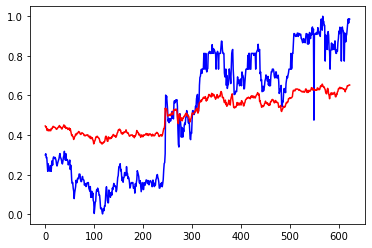

In [124]:
## Plot showing the actual and predicted values  
plt.plot(test,color="blue")
plt.plot(testY,color='red')
plt.show()

## Linear Regression

In [125]:
## Applying the linear Regression Model to our data
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
regr = linear_model.LinearRegression()
regr.fit(trainX, trainY)
test= regr.predict(testX)

In [126]:
test=[]
test= regr.predict(testX)
print(test)

[0.29875305 0.30151907 0.28660008 0.29098466 0.24422647 0.2267178
 0.25223044 0.22536437 0.22933672 0.22145072 0.23948891 0.23745842
 0.2223629  0.25896892 0.2592337  0.25646785 0.2829218  0.2958988
 0.2908963  0.28209776 0.28245082 0.276654   0.2694446  0.25437844
 0.24649243 0.25249514 0.27094546 0.2735644  0.2842165  0.29787034
 0.3091993  0.28077355 0.28504053 0.27824315 0.2599696  0.25037664
 0.27138695 0.28465775 0.29636973 0.320293   0.29636973 0.27844903
 0.2997534  0.26099938 0.26879725 0.26853243 0.27029786 0.24446194
 0.24814013 0.26394194 0.26844427 0.22818919 0.25655589 0.21850805
 0.17254442 0.14182362 0.1534175  0.12999427 0.11878293 0.0777334
 0.1054235  0.12204934 0.13576186 0.16801298 0.1540354  0.15691926
 0.1835792  0.1821374  0.1874931  0.20985672 0.19779213 0.19902794
 0.1747809  0.16224526 0.16262794 0.18149003 0.19049433 0.18154883
 0.17622271 0.17254442 0.14738521 0.14111733 0.14903302 0.13891041
 0.1451783  0.14985682 0.1550064  0.15059257 0.15456516 0.1268163

In [127]:
##Evaluating the linear Regression Model Using the RMSE.
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(test,testY))

0.2111197496690744

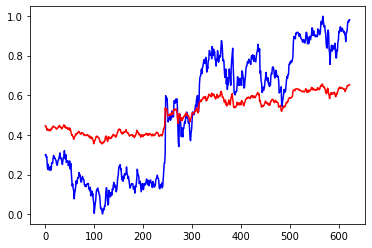

In [128]:
##Visualizing the Actual Values of the test set and the predicted Values.
plt.plot(test,color="blue")
plt.plot(testY,color='red')
plt.show()

## Decision Tree Regressor

In [129]:
##Applying the Decision tree and fitting to the training data
from sklearn.tree import DecisionTreeRegressor
dtr= DecisionTreeRegressor(max_depth=2)
dtr=dtr.fit(trainX, trainY)
test=dtr.predict(testX)

In [130]:
test=[]
test= dtr.predict(testX)
print(test)

[0.38808968 0.38808968 0.38808968 0.38808968 0.17726312 0.17726312
 0.17726312 0.17726312 0.17726312 0.17726312 0.17726312 0.17726312
 0.17726312 0.17726312 0.17726312 0.17726312 0.38808968 0.38808968
 0.38808968 0.38808968 0.38808968 0.17726312 0.17726312 0.17726312
 0.17726312 0.17726312 0.17726312 0.17726312 0.38808968 0.38808968
 0.38808968 0.38808968 0.38808968 0.17726312 0.17726312 0.17726312
 0.17726312 0.38808968 0.38808968 0.38808968 0.38808968 0.17726312
 0.38808968 0.17726312 0.17726312 0.17726312 0.17726312 0.17726312
 0.17726312 0.17726312 0.17726312 0.17726312 0.17726312 0.17726312
 0.17726312 0.17726312 0.17726312 0.17726312 0.17726312 0.17726312
 0.17726312 0.17726312 0.17726312 0.17726312 0.17726312 0.17726312
 0.17726312 0.17726312 0.17726312 0.17726312 0.17726312 0.17726312
 0.17726312 0.17726312 0.17726312 0.17726312 0.17726312 0.17726312
 0.17726312 0.17726312 0.17726312 0.17726312 0.17726312 0.17726312
 0.17726312 0.17726312 0.17726312 0.17726312 0.17726312 0.1772

In [131]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(test,testY))

0.20914642866008706

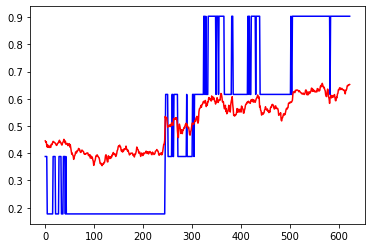

In [132]:
plt.plot(test,color="blue")
plt.plot(testY,color='red')
plt.show()

## Support Vector Regresor


In [133]:
from sklearn.svm import SVR
svr = SVR(C=1.0, epsilon=0.2)
svr.fit(trainX, trainY)
test=svr.predict(testX)

C:\Python\envs\ML Project\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [134]:
test=[]
test= svr.predict(testX)
print(test)

[0.34135887 0.34311759 0.33370882 0.33645416 0.30807824 0.29799262
 0.31278999 0.29722592 0.29948155 0.29501946 0.30531896 0.30414317
 0.29553232 0.31680472 0.31696338 0.31530954 0.3314187  0.33955079
 0.33639865 0.3309073  0.33112635 0.32754407 0.32313123 0.31406503
 0.30940582 0.31294687 0.32404598 0.32564713 0.33222344 0.34079896
 0.34803429 0.33008675 0.33273639 0.32852312 0.31740461 0.31169315
 0.32431545 0.33249803 0.33984863 0.35522068 0.33984863 0.32865013
 0.34199417 0.31802294 0.32273731 0.32257629 0.32365103 0.30821596
 0.31037432 0.31979526 0.3225227  0.29882828 0.31536207 0.29337087
 0.2688252  0.25374261 0.25930586 0.2482305  0.24316162 0.22592175
 0.23732155 0.24462272 0.25089715 0.26653199 0.25960678 0.2610171
 0.27450655 0.27375647 0.27655434 0.28857655 0.28202352 0.28268756
 0.2699656  0.26364707 0.26383729 0.27342044 0.2781361  0.27345095
 0.27070379 0.2688252  0.25639158 0.25340882 0.25718342 0.25236966
 0.25533606 0.25758049 0.26008055 0.25793579 0.25986512 0.24677

In [135]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(test,testY))

0.11109011037310307

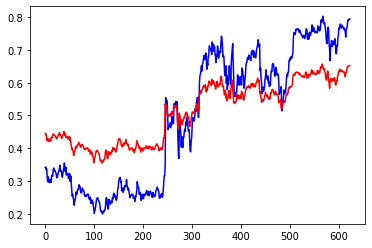

In [136]:
plt.plot(test,color="blue")
plt.plot(testY,color='red')
plt.show()

## K Neighbors Regressor

In [137]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(testX, testY)
test=neigh.predict(testX)

In [138]:
test=[]
test= neigh.predict(testX)
print(test)

[0.44664598 0.43707147 0.44035226 0.43384424 0.4260373  0.42331898
 0.42929134 0.4234082  0.42651492 0.42944756 0.42791426 0.41918117
 0.42961717 0.4322329  0.4322329  0.430068   0.44085664 0.4467174
 0.43384424 0.43881673 0.43881673 0.43431294 0.43332645 0.43249625
 0.43234444 0.42929134 0.43868282 0.44029865 0.44414636 0.44664598
 0.48723835 0.44008887 0.4411691  0.43891048 0.43088934 0.4292512
 0.43868282 0.4411691  0.4448293  0.48960412 0.4448293  0.43891048
 0.43933454 0.43275958 0.43574128 0.4296216  0.4325855  0.4260373
 0.42812186 0.43550026 0.4296216  0.42117637 0.430068   0.41929275
 0.39787617 0.4038619  0.39301974 0.39298847 0.38586897 0.37860662
 0.39136374 0.39667547 0.40176404 0.40358964 0.39978218 0.40200505
 0.41112876 0.40985215 0.4122357  0.41395426 0.41472644 0.40945935
 0.4121732  0.402322   0.40518317 0.4096334  0.40485287 0.4096334
 0.40739268 0.39787617 0.39894748 0.3973115  0.4008311  0.39759052
 0.39556396 0.39825112 0.40246928 0.400965   0.40042937 0.39262694

In [139]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(test,testY))

0.00642871962794731

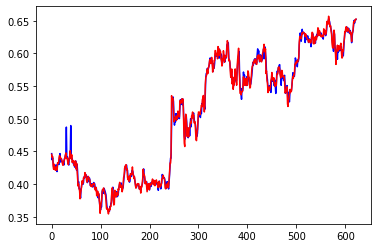

In [140]:
plt.plot(test,color="blue")
plt.plot(testY,color='red')
plt.show()

After evaluation of five regression models using the Root Mean Squared Error metric (RMSE), we have come to the conclusion that the best model for prediction is the K Nearest Neighbor whcih has the lowest value for RMSE with 0.00642872.